# Random Forest (Company Data)

Shubham's Assignment

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load data
company=pd.read_csv("company_data.csv")
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
company.shape

(400, 11)

In [5]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
# Converting from Categorical Data

In [8]:
company['High'] = company.Sales.map(lambda x: 1 if x>8 else 0)

In [9]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')

In [10]:
company['Urban']=company['Urban'].astype('category')

In [11]:
company['US']=company['US'].astype('category')

In [12]:
company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
High              int64
dtype: object

In [13]:
company.head(20)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,1
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,0
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,1
8,6.54,132,110,0,108,124,Medium,76,10,No,No,0
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,0


In [14]:
# label encoding to convert categorical values into numeric

In [15]:
company['ShelveLoc']=company['ShelveLoc'].cat.codes

In [16]:
company['Urban']=company['Urban'].cat.codes

In [17]:
company['US']=company['US'].cat.codes

In [18]:
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
5,10.81,124,113,13,501,72,0,78,16,0,1,1
6,6.63,115,105,0,45,108,2,71,15,1,0,0
7,11.85,136,81,15,425,120,1,67,10,1,1,1
8,6.54,132,110,0,108,124,2,76,10,0,0,0
9,4.69,132,113,0,131,124,2,76,17,0,1,0


In [19]:
company.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
390,5.47,108,75,9,61,111,2,67,12,1,1,0
391,6.10,153,63,0,49,124,0,56,16,1,0,0
392,4.53,129,42,13,315,130,0,34,13,1,1,0
393,5.57,109,51,10,26,120,2,30,17,0,1,0
394,5.35,130,58,19,366,139,0,33,16,1,1,0
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0
399,9.71,134,37,0,27,120,1,49,16,1,1,1


In [20]:
# Graphical Visualization

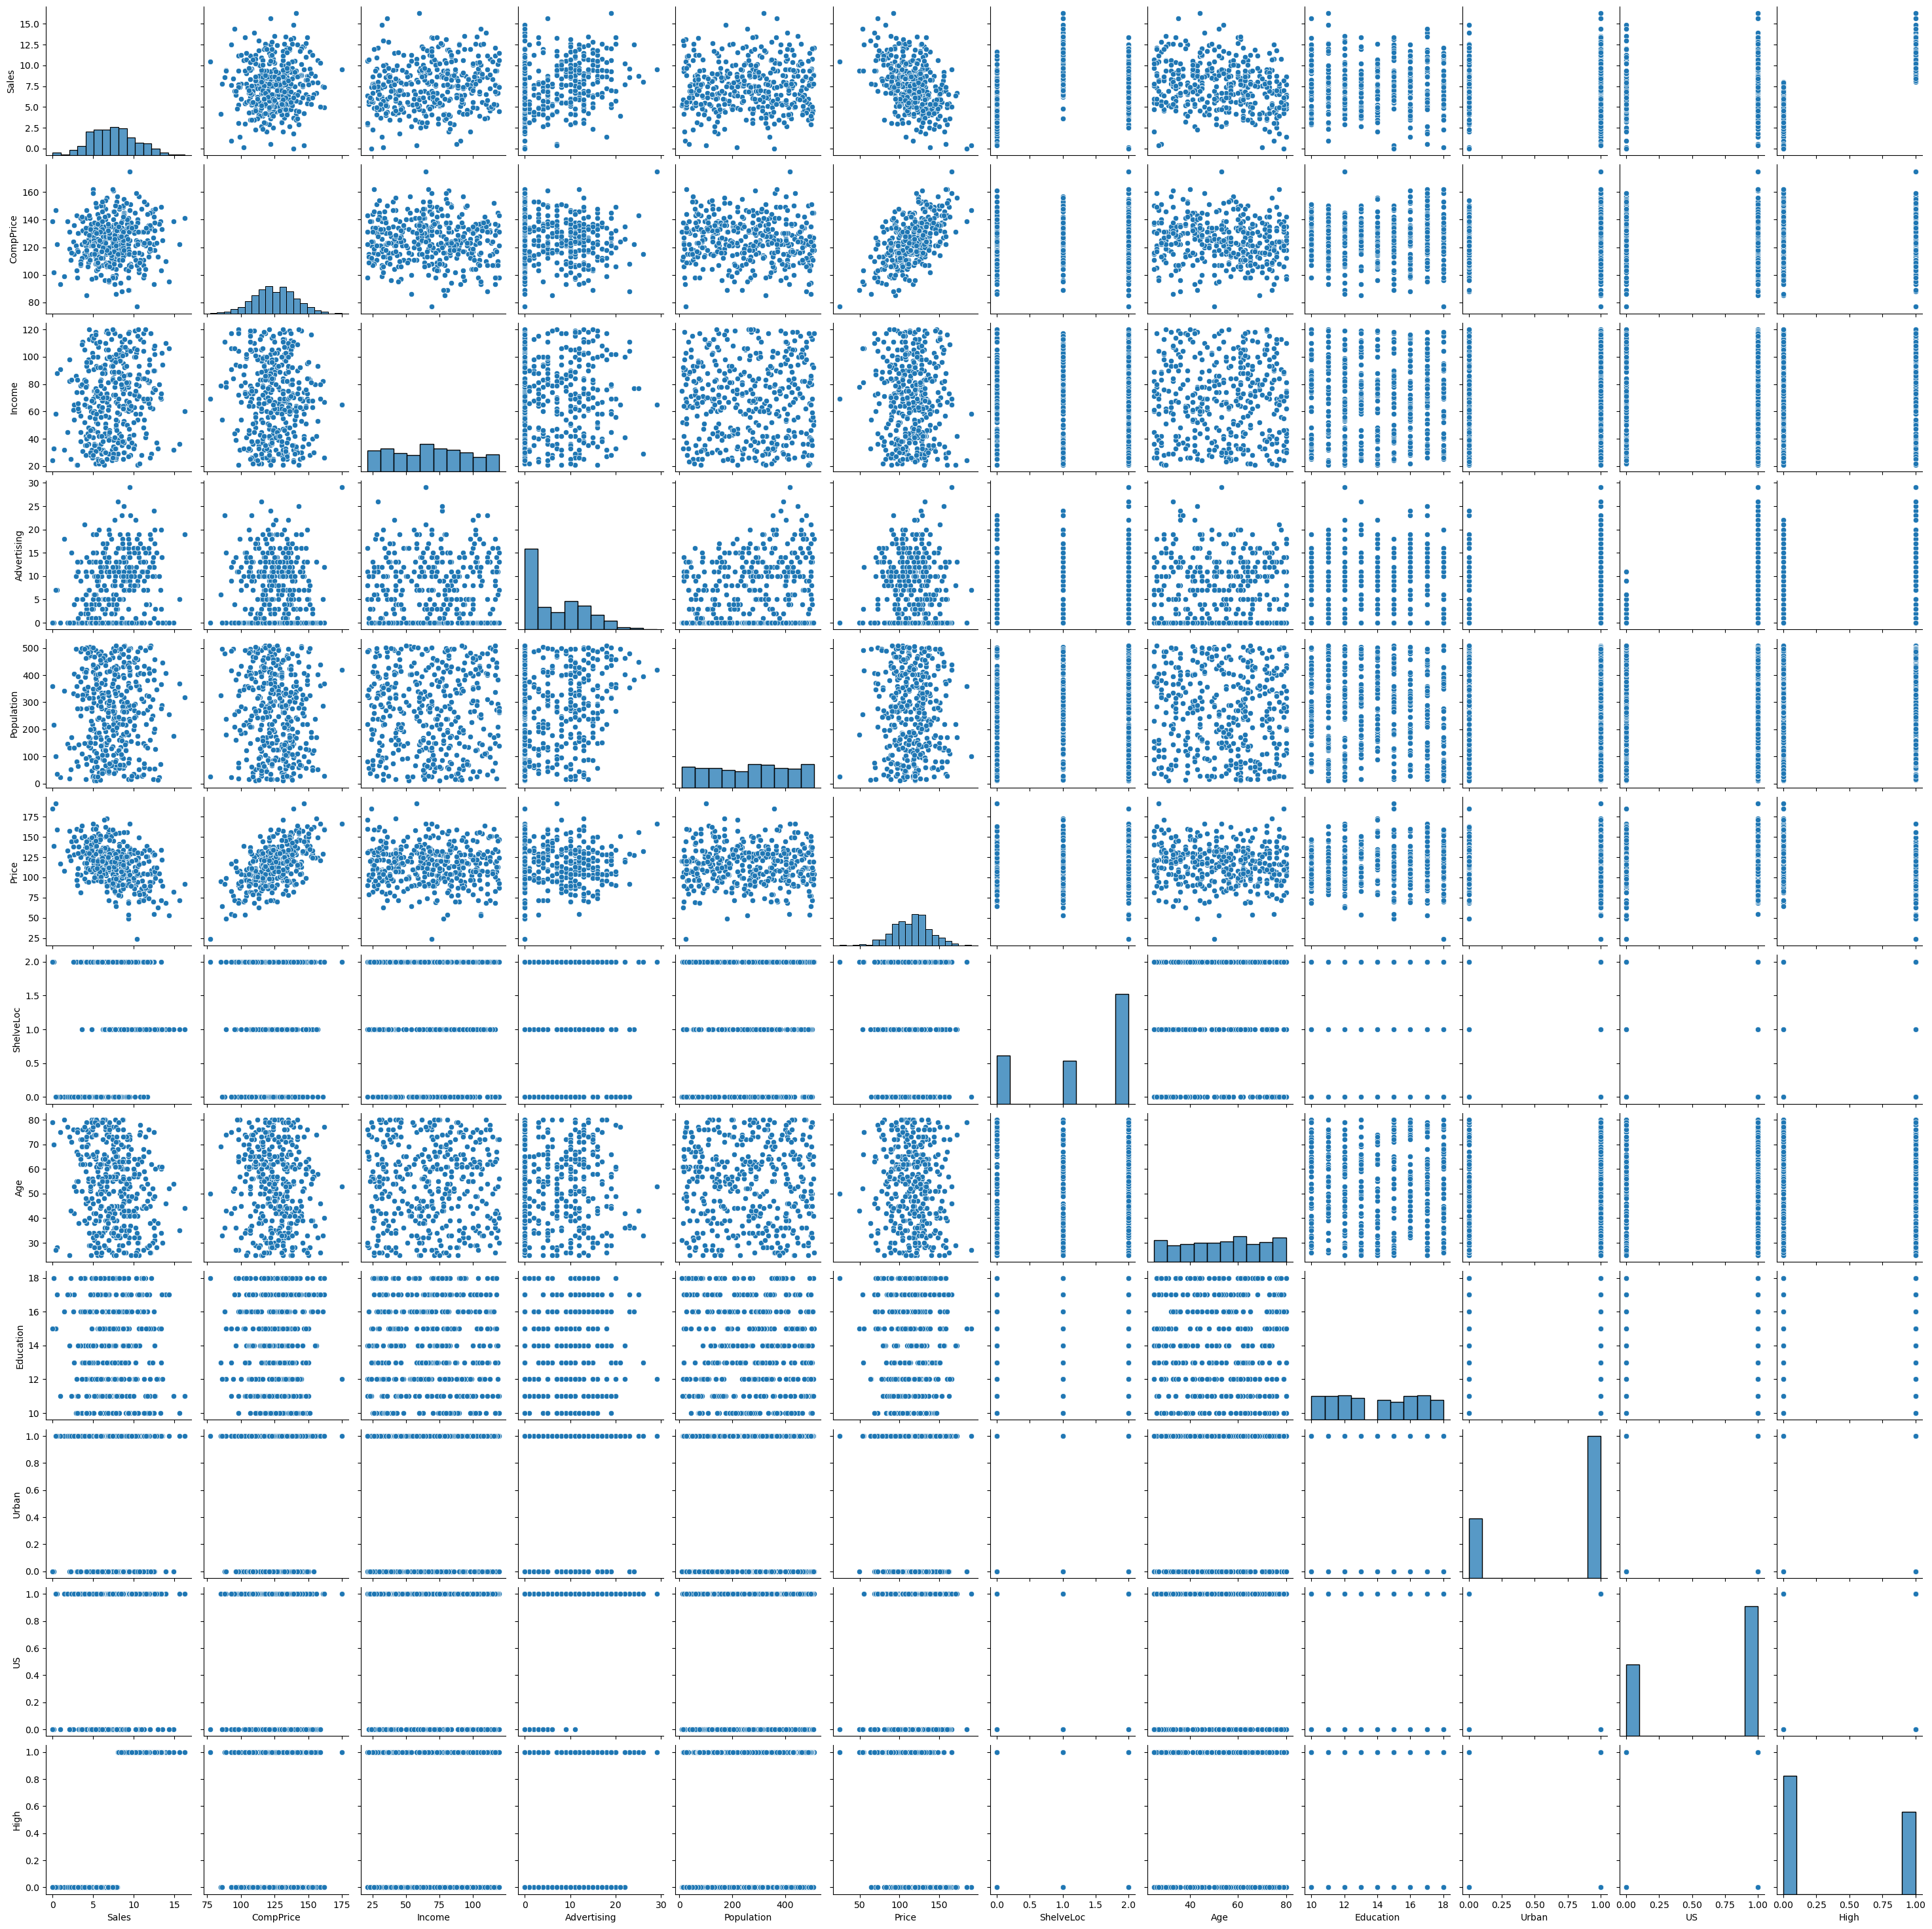

In [21]:
sns.pairplot(company)

In [22]:
sns.barplot(company['Sales'], company['Income'])

<AxesSubplot:xlabel='Sales', ylabel='Income'>

In [23]:
sns.boxplot(company['Sales'], company['Income'])

<AxesSubplot:xlabel='Sales', ylabel='Income'>

In [24]:
sns.lmplot(x='Income', y='Sales', data=company)

In [25]:
sns.jointplot(company['Sales'], company['Income'])

In [26]:
sns.stripplot(company['Sales'], company['Income'])

<AxesSubplot:xlabel='Sales', ylabel='Income'>

In [27]:
sns.distplot(company['Sales'])

<AxesSubplot:xlabel='Sales', ylabel='Income'>

In [28]:
sns.distplot(company['Income'])

<AxesSubplot:xlabel='Income', ylabel='Income'>

In [29]:
# Set feature and target variables

In [30]:
feature_cols=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']

In [31]:
x = company.drop(['Sales', 'High'], axis = 1)

In [32]:
x = company[feature_cols]

In [33]:
y = company.High

In [34]:
print(x)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [35]:
print(y)

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64


In [36]:
# Splitting the data into the Training data and Test data

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [39]:
print(x_train)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
250        137     105           10         435    156          1   72   
63         119      88           10         170    101          2   61   
312        137     117            5         337    135          0   38   
159        119      60            0         372     70          0   30   
283        135     110            0         112    117          2   80   
..         ...     ...          ...         ...    ...        ...  ...   
323        107     105           18         428    103          2   34   
192        108      26            0         408     93          2   56   
117        145      53            0         507    119          2   41   
47         126      98            0         173    108          0   55   
172        104     102           13         123    110          1   35   

     Education  Urban  US  
250         14      1   1  
63          13      1   1  
312         10      1   1  

In [40]:
print(y_train)

250    1
63     1
312    0
159    1
283    0
      ..
323    1
192    0
117    1
47     0
172    1
Name: High, Length: 300, dtype: int64


In [41]:
print(x_test)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
132        125      87            9         232    136          1   72   
309        131     111           13          33     80          0   68   
341         98     120            0         268     93          2   72   
196        130      28            6         410    133          0   72   
246        120      56           20         266     90          0   78   
..         ...     ...          ...         ...    ...        ...  ...   
146        114      83            0         412    131          0   39   
135         96      94           14         384    120          2   36   
390        108      75            9          61    111          2   67   
264        128      29            5         324    159          1   31   
364        122      21           16         488    131          1   30   

     Education  Urban  US  
132         10      1   1  
309         18      1   1  
341         10      0   0  

In [42]:
print(y_test)

132    1
309    1
341    0
196    0
246    0
      ..
146    0
135    0
390    0
264    0
364    1
Name: High, Length: 100, dtype: int64


In [43]:
# Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
x_train = sc.fit_transform(x_train)

In [47]:
x_test = sc.transform(x_test)

In [48]:
print(x_train)

[[ 0.80747051  1.34718373  0.50284783 ...  0.04306425  0.65985354
   0.76635604]
 [-0.37901677  0.73087255  0.50284783 ... -0.3484289   0.65985354
   0.76635604]
 [ 0.80747051  1.78222692 -0.23808709 ... -1.52290834  0.65985354
   0.76635604]
 ...
 [ 1.33479818 -0.53800341 -0.979022   ... -0.73992205  0.65985354
  -1.30487651]
 [ 0.08239495  1.09340854 -0.979022   ...  0.82605054  0.65985354
  -1.30487651]
 [-1.36775616  1.23842294  0.94740878 ...  0.82605054  0.65985354
   0.76635604]]


In [49]:
print(x_test)

[[ 1.64789899e-02  6.94618953e-01  3.54660846e-01 -2.66585224e-01
   8.57328536e-01 -3.43546277e-01  1.18062113e+00 -1.52290834e+00
   6.59853543e-01  7.66356045e-01]
 [ 4.11974748e-01  1.56470532e+00  9.47408779e-01 -1.63504076e+00
  -1.52217244e+00 -1.52818861e+00  9.31763696e-01  1.60903683e+00
   6.59853543e-01  7.66356045e-01]
 [-1.76325192e+00  1.89098771e+00 -9.79022002e-01 -1.90254287e-02
  -9.69788285e-01  8.41096058e-01  1.18062113e+00 -1.52290834e+00
  -1.51548781e+00 -1.30487651e+00]
 [ 3.46058788e-01 -1.44434338e+00 -8.99001031e-02  9.57460430e-01
   7.29855270e-01 -1.52818861e+00  1.18062113e+00  8.26050539e-01
   6.59853543e-01  7.66356045e-01]
 [-3.13100808e-01 -4.29242610e-01  1.98471766e+00 -3.27787507e-02
  -1.09726155e+00 -1.52818861e+00  1.55390727e+00  1.60903683e+00
   6.59853543e-01  7.66356045e-01]
 [-1.81268889e-01  1.23842294e+00  1.83653068e+00  1.36318343e+00
   3.04944381e-01 -1.52818861e+00 -1.49459625e+00 -3.48428900e-01
   6.59853543e-01  7.66356045e-01

In [50]:
# Training the Random Forest Classification model on the Training data

In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [52]:
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [53]:
classifier.score(x_test, y_test)

0.75

In [54]:
# Predicting the Test set results

In [55]:
y_pred = classifier.predict(x_test)

In [56]:
y_pred


array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [57]:
# Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [59]:
cm = confusion_matrix(y_test, y_pred)

In [60]:
print(cm)

[[49  6]
 [19 26]]


In [61]:
accuracy_score(y_test, y_pred)

0.75

In [62]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
classifier.score(x_test, y_test)

0.77

In [64]:
# Done